# Simple linear regression - Tutorial 1

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables is 'size'.

Good luck!

## Import the relevant libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Load the data

In [78]:
data = pd.read_csv("real_estate_price_size.csv")

In [79]:
data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


## Create the regression

### Declare the dependent and the independent variables

In [80]:
Y = data["price"]
x1 = data["size"]

### Explore the data

In [81]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


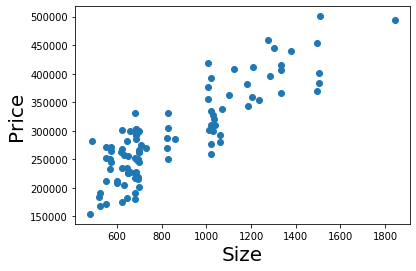

In [82]:
plt.scatter(x1,Y)
plt.xlabel("Size", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.show()

### Regression itself

In [83]:
# The add_constant method adds our b0, as a vector of 1. This later gets shaped by OLS.
x = sm.add_constant(x1)
#print(x)
# The fit method applies the specific estimation technique (OLS in this case)
results = sm.OLS(Y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           8.13e-31
Time:                        23:52:35   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# We can see here that R^2 & Adjusted R^2 is high, so our model fits the data well.
# The expected value of any size of the house is price = 223.18*(HouseSize) + 151. 

### Plot the regression line on the initial scatter

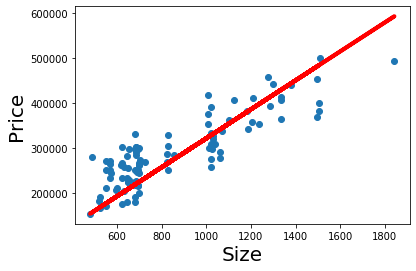

In [100]:
plt.scatter(x1,Y)
hat = 322.1787*x1 + 151
fig2 = plt.plot(x1,hat, lw=4, c="red", label="SLR line")
plt.xlabel("Size", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.show()